# pythia-temporal-baselines

Compare (offset-based) Pythia prefetchers against:
- PC+address temporal correlation: ISB, Voyager (TODO)
- Address temporal correlation prefetchers: Domino, STMS

Can do comparisons across:
- [Benchmark suites](#plots-suites)
- [Single becnhmarks](#plots-single-benchmarks)


In [1]:
from utils import plots, tables, utils
%matplotlib widget

In [2]:
# Knobs
#baseline_path = '/u/cmolder/GitHub/Pythia/out/pythia_temporal/exp_394r_degree1.csv'
baseline_path = '/u/cmolder/GitHub/ChampSim/out/pythia_temporal/degree1.csv'

seed = 1337
suites = {
    'SPEC/GAP irregular': [
        'astar', 'bfs', 'cc', 'mcf', 'omnetpp', 'pr', 'soplex', 'sphinx3', 
        'xalancbmk'
    ]
}
metrics  = [
    'ipc_improvement', 
    'LLC_issued_prefetches', 
    'LLC_accuracy', 
    'LLC_coverage',
    'LLC_mpki_reduction', 
]
features = [
    {'Address'},
    {'PC_Address'},
    #{'Delta_Path'},
    #{'Delta_Path', 'PC_Delta'},
    #{'Delta_Path', 'PC_Address'},
    #{'Delta_Path', 'Address'},
]
baselines = [
    'bo',
    #'domino',
    #'stms',
    'sisb',
    'ac_table',
]

# Plots (suites)
Fix prefetch degree to 1 for everything (except Bingo), and compare to Bingo, SPP and Bingo+SPP hybrid.

In [3]:
pythia_df = tables.load_stats_csv_pythia(baseline_path, features)
baseline_df = tables.load_stats_csv(baseline_path, baselines, prefetchers_level='llc')

# for k, v in baseline_df.items():
#     print(k)
#     print(len(v))

## PC+Address : Pythia vs. ISB, Voyager

=== SPEC/GAP irregular ===


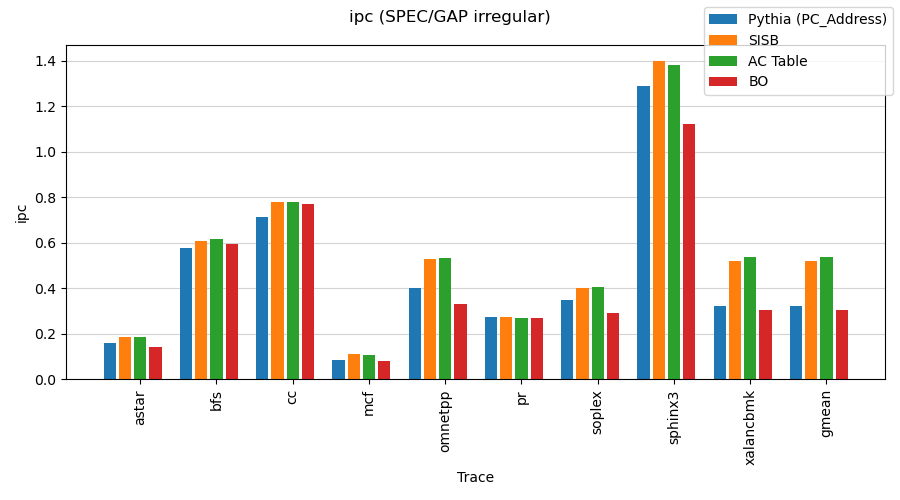

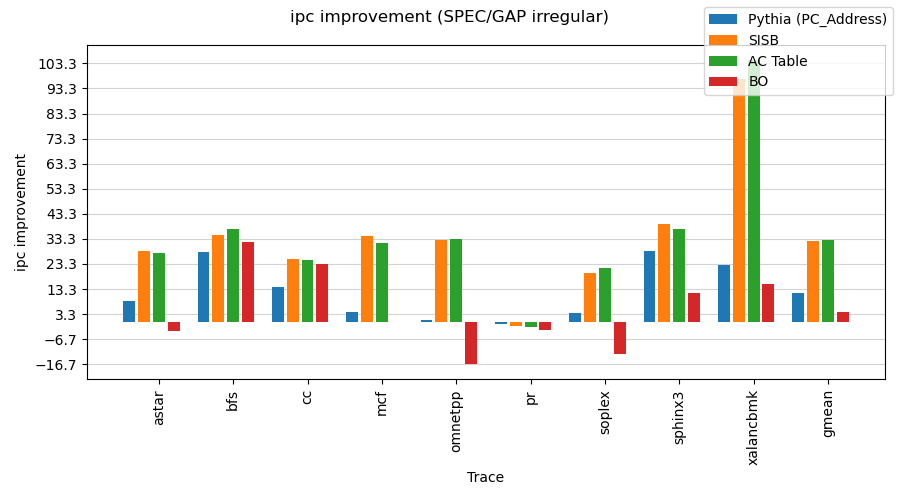

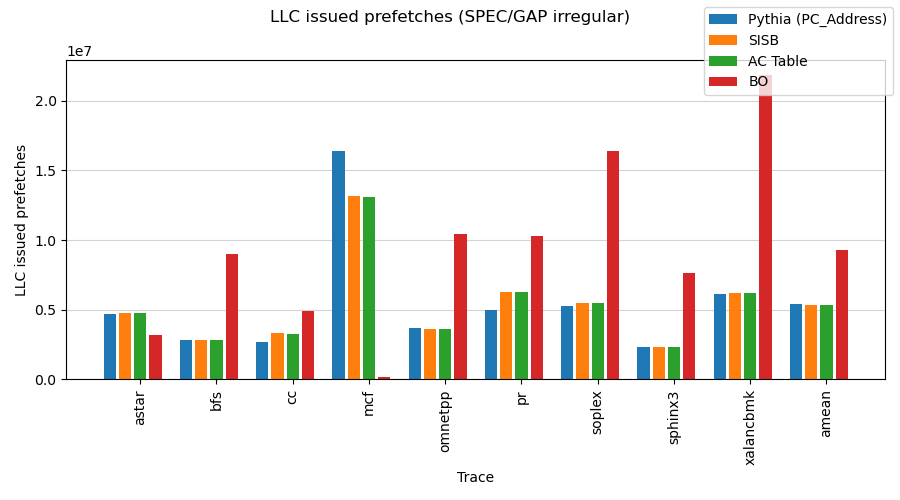

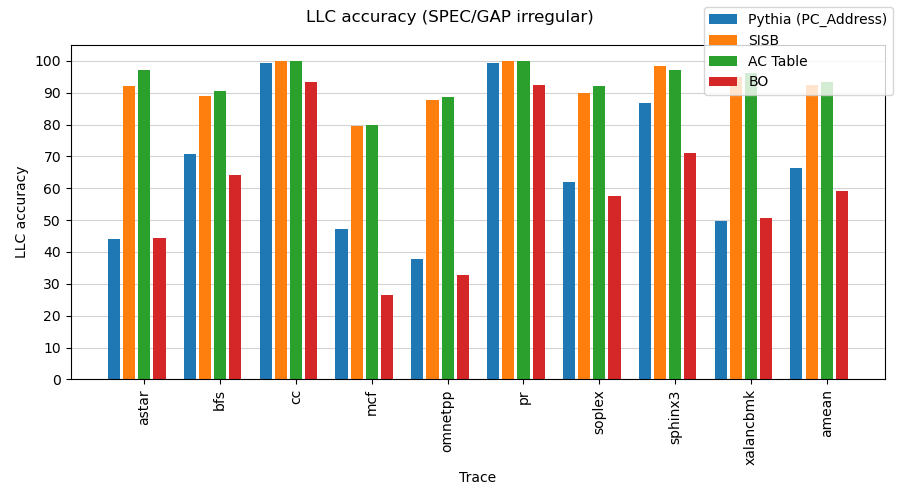

In [4]:
pcaddr_df = {
    'Pythia (PC_Address)': pythia_df['PC_Address'],
    #'Pythia (Delta_Path)': pythia_df['Delta_Path'],
    'SISB': baseline_df['sisb'],
    'AC Table': baseline_df['ac_table'],
    'BO': baseline_df['bo'],
}
plots.plot_everything(pcaddr_df, suites=suites, metrics=metrics)

## Address: Pythia vs. STMS, Domino

In [22]:
addr_df = {
    'Pythia (Address)': pythia_df['Address'],
    'STMS': baseline_df['stms'],
    'Domino': baseline_df['domino']
}
plots.plot_everything(addr_df, suites=suites, metrics=metrics)

KeyError: 'stms'

# Tables

## PC+Address: Pythia vs. ISB, Voyager

In [6]:
tables.table_everything(pcaddr_df, suites=suites, metrics=metrics)

=== SPEC/GAP irregular ===
Pythia (PC_Address)


,ipc,ipc_improvement,LLC_issued_prefetches,LLC_accuracy,LLC_coverage,LLC_mpki_reduction
trace,,,,,,
astar,0.54,-0.11,308657.0,21.21,-11.97,22.75
bfs,0.40,3.48,3570341.0,68.08,27.96,28.86
cc,0.46,13.22,2583381.0,99.33,77.08,77.08
mcf,0.10,3.46,18619077.0,42.44,11.14,23.12
omnetpp,0.26,4.02,4415341.0,30.38,11.65,28.90
pr,0.19,0.94,5820693.0,99.49,88.81,88.81
soplex,0.35,3.58,6666556.0,54.96,5.47,22.25
sphinx3,0.92,7.20,2856426.0,86.11,3.48,5.24
xalancbmk,0.49,0.38,260463.0,28.33,5.06,46.64


SISB


,ipc,ipc_improvement,LLC_issued_prefetches,LLC_accuracy,LLC_coverage,LLC_mpki_reduction
trace,,,,,,
astar,0.54,0.71,231509.00,87.10,13.05,40.02
bfs,0.42,6.17,3522084.00,88.32,46.08,46.76
cc,0.47,16.90,2964362.00,99.86,87.82,87.82
mcf,0.11,15.56,16089880.00,78.02,31.84,41.03
omnetpp,0.31,23.32,4158605.00,86.56,60.37,68.10
pr,0.19,0.67,6057880.00,99.77,68.14,68.15
soplex,0.39,16.00,6746315.00,87.08,20.28,34.43
sphinx3,0.97,13.68,2837122.00,97.60,24.10,25.48
xalancbmk,0.50,1.04,190827.00,74.48,8.06,48.33


BO


,ipc,ipc_improvement,LLC_issued_prefetches,LLC_accuracy,LLC_coverage,LLC_mpki_reduction
trace,,,,,,
astar,0.54,-0.24,327777.00,0.00,-14.96,20.70
bfs,0.40,2.42,3555746.00,62.97,25.78,26.71
cc,0.48,17.63,3213790.00,99.00,96.15,96.15
mcf,0.10,0.00,0.00,100.00,0.00,13.49
omnetpp,0.25,2.68,2779504.00,25.70,10.18,27.71
pr,0.20,1.26,6315292.00,99.22,95.39,95.39
soplex,0.35,1.79,6188173.00,49.90,13.42,28.79
sphinx3,0.96,12.21,2904158.00,86.65,21.06,22.49
xalancbmk,0.49,0.27,130134.00,25.26,2.67,45.30


## Address: Pythia vs. Domino, STMS

In [7]:
tables.table_everything(addr_df, suites=suites, metrics=metrics)

=== SPEC/GAP irregular ===
Pythia (Address)


,ipc,ipc_improvement,LLC_issued_prefetches,LLC_accuracy,LLC_coverage,LLC_mpki_reduction
trace,,,,,,
astar,0.54,-0.10,308425.00,21.35,-12.17,22.62
bfs,0.40,3.49,3570421.00,68.09,28.01,28.92
cc,0.46,12.72,2561172.00,99.31,74.58,74.58
mcf,0.10,3.47,18622037.00,42.46,11.17,23.15
omnetpp,0.26,4.03,4415250.00,30.36,11.67,28.91
pr,0.19,0.94,5818725.00,99.49,88.79,88.80
soplex,0.35,3.59,6697392.00,54.84,5.32,22.12
sphinx3,0.92,7.20,2856441.00,86.12,3.55,5.30
xalancbmk,0.49,0.37,260007.00,28.38,5.29,46.77


STMS


,ipc,ipc_improvement,LLC_issued_prefetches,LLC_accuracy,LLC_coverage,LLC_mpki_reduction
trace,,,,,,
astar,0.54,0.21,67198.00,57.36,2.90,33.01
bfs,0.36,-7.04,1413652.00,74.52,-22.87,-21.32
cc,0.43,6.47,635981.00,98.65,43.35,43.35
mcf,0.10,2.91,9056844.00,56.16,2.48,15.64
omnetpp,0.26,5.89,2414437.00,61.14,17.31,33.44
pr,0.19,-1.26,1695549.00,91.49,27.39,27.43
soplex,0.34,1.16,3749357.00,66.91,2.94,20.17
sphinx3,0.85,-0.23,842236.00,94.80,-7.52,-5.56
xalancbmk,0.49,0.43,68100.00,52.65,3.77,45.92


Domino


,ipc,ipc_improvement,LLC_issued_prefetches,LLC_accuracy,LLC_coverage,LLC_mpki_reduction
trace,,,,,,
astar,0.54,0.19,67615.00,55.02,2.61,32.82
astar,0.54,0.00,0.00,100.00,0.00,31.01
bfs,0.36,-7.38,1462282.00,77.56,-25.19,-23.61
bfs,0.39,0.00,0.00,100.00,0.00,1.26
cc,0.42,4.96,741868.00,98.78,34.08,34.09
cc,0.40,0.00,0.00,100.00,0.00,0.01
mcf,0.10,2.86,9062092.00,63.75,2.39,15.56
mcf,0.10,0.00,0.00,100.00,0.00,13.49
omnetpp,0.26,4.88,2498933.00,52.40,14.90,31.51
